# The Quantum Harmonic Oscillator

The quantum harmonic oscillator is a quantum mechanical model that describes a particle has a potential in form of $V(x) = \frac{1}{2}m\omega^2x^2$. The system's energy levels are quantized and follow the formula $E_n = \left(n + \frac{1}{2}\right)\hbar\omega$, where $n$ is the quantum number, $\hbar$ is the reduced Planck constant, and $\omega$ is the angular frequency. The density matrix formalism provides a way to describe the statistical state of such quantum systems. In the case of a quantum harmonic oscillator, the density matrix $\rho(x, x', \beta)$ is used to represent the probabilities of the system being in different states. It is built from the wave functions $\psi_n(x)$ of the system and includes both diagonal terms (probabilities at the same position) and off-diagonal terms (quantum coherence between different positions). The density matrix encapsulates the thermal and quantum properties of the harmonic oscillator, particularly in relation to its energy distribution and spatial probabilities.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="./imgs/harmonic_wavefunction.png" alt="Algorithm to obtain the wave functions of the harmonic oscillator in different quantum state" width="400"/>

In [2]:
def harmonic_wavefunction(N, x):
    dim = np.shape(x)[0]
    psi_arr = np.empty((N+2, dim))
    psi_arr[0, :] = np.zeros(dim)  # unphysical, starts recursion
    psi_arr[1, :] = np.pi**(-1/4)*np.exp(-x**2/2)  # psi_0
    for i in range(2, N+2):
        psi_arr[i, :] = np.sqrt(2/(i-1))*x*psi_arr[i-1, :] - np.sqrt(((i-1)-1)/(i-1))*psi_arr[i-2, :]

    return psi_arr[1:, :]  # return psi_0 to psi_N

In [3]:
N = 5
x = np.linspace(-6, 6, 500)

In [4]:
psi_arr = harmonic_wavefunction(N, x)

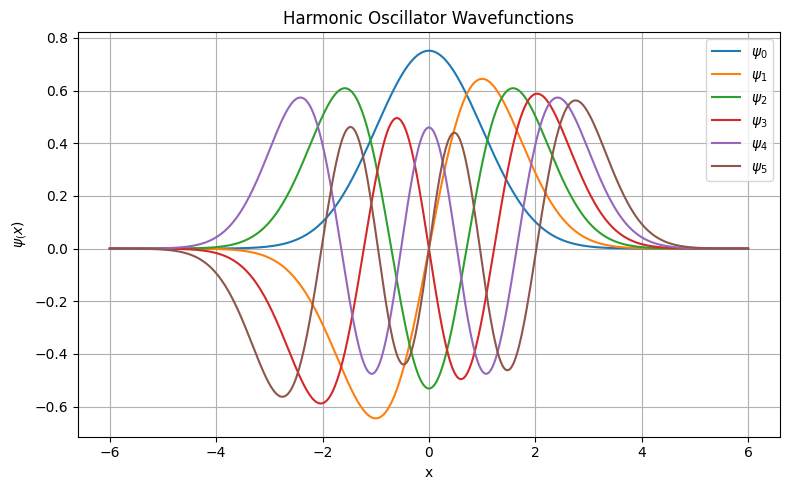

In [5]:
plt.figure(figsize=(8, 5))
for i in range(N+1):
    plt.plot(x, psi_arr[i, :], label=rf'$\psi_{i}$')

plt.title('Harmonic Oscillator Wavefunctions')
plt.xlabel('x')
plt.ylabel(r'$\psi_(x)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<img src="./imgs/density_matrix.png" alt="Density Matrix" width="550"/><br>
<img src="./imgs/harmonic_density.png" alt="Algorithm to obtain the density matrix of the harmonic oscillator" width="550"/><br>
Reference: Krauth, W. (2006). Statistical mechanics : algorithms and computations. Oxford, United Kingdom ; New York, Ny: Oxford University Press.

In [6]:
def harmonic_density(N, x, beta):
    psi_x_matrix = harmonic_wavefunction(N, x).T
    psi_xdash_matrix = np.copy(psi_x_matrix)
    E_arr = np.arange(N+1) + 0.5

    part1 = psi_x_matrix * np.exp(-beta*E_arr)
    part2 = psi_xdash_matrix.T
    density_metrix = np.matmul(part1, part2)

    return density_metrix

In [7]:
N = 100
beta = 1
x = np.linspace(-10, 10, 1000)
beta_arr = np.array([0.5, 1, 2, 4, 6, 8])

In [8]:
density_matrix = harmonic_density(N, x, beta)
print(np.shape(density_matrix))

(1000, 1000)


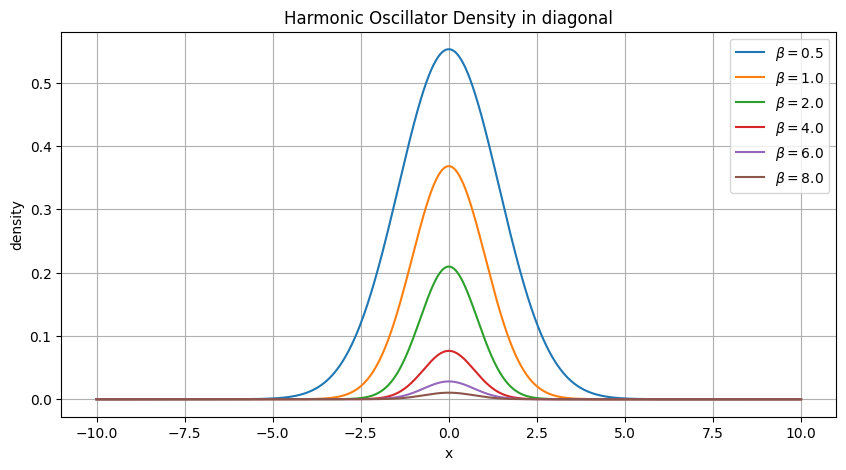

In [9]:
plt.figure(figsize=(10, 5))
for beta in beta_arr:
    density_matrix = harmonic_density(N, x, beta)
    diag_density = np.diag(density_matrix)
    plt.plot(x, diag_density, label=rf'$\beta = {beta}$')

plt.title(r"Harmonic Oscillator Density in diagonal")
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()

Partition Function of the system given by,   
<img src="./imgs/harmonic_partition_function.png" alt="Partition function of harmonic oscillator" width="550"/><br>
And also, an approximation for $Z(\beta)$ can be obtained by using the diagonal terms of the density matrix.   
<img src="./imgs/harmonic_partition_function_approx.png" alt="Approximation for the Partition function of harmonic oscillator by using desity matrix" width="300"/><br>

In [10]:
def Z_beta_approx(N, x, beta):
    density_matrix = harmonic_density(N, x, beta)
    diag_density = np.diag(density_matrix)
    val = np.trapz(diag_density, x)
    return val

In [11]:
Z_beta = lambda beta: 1 / (2*np.sinh(beta/2))

In [12]:
N = 100
beta = 1
x = np.linspace(-10, 10, 1000)
beta_arr = np.linspace(0.5, 2, 200)

In [13]:
Z_beta_arr = Z_beta(beta_arr)
Z_beta_approx_arr = np.zeros_like(beta_arr)
for i in range(len(beta_arr)):
    Z_beta_approx_val = Z_beta_approx(N, x, beta_arr[i])
    Z_beta_approx_arr[i] = Z_beta_approx_val

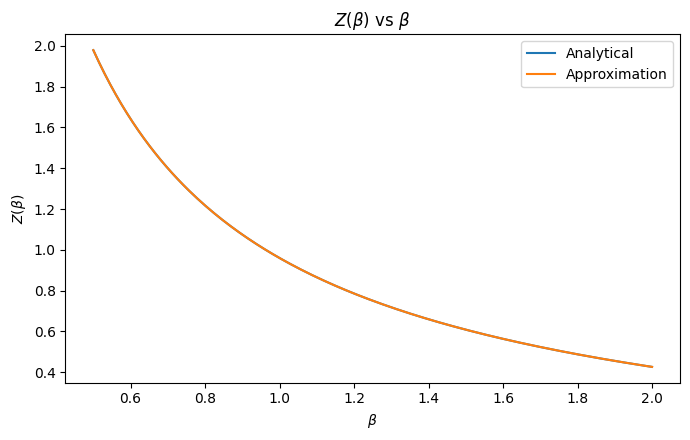

In [14]:
plt.figure(figsize=(7, 4.5))
plt.plot(beta_arr, Z_beta_arr, label="Analytical")
plt.plot(beta_arr, Z_beta_approx_arr, label="Approximation")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$Z(\beta)$")
plt.title(r"$Z(\beta)$ vs $\beta$")
plt.legend()
plt.tight_layout()
plt.show()